In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(1234)
import numpy as np
import numpy as np
import pickle
import keras

In [2]:
dirname = 'Radio Training Data'

In [3]:
counter = 0
classes = []
data = []

for file in os.listdir(os.path.join(dirname)):
    if (file.split('.')[1]) == 'jpg':
        #print(os.path.join(dirname,file))
     
        #read images in grayscale
        img = cv2.imread(os.path.join(dirname,file),0)

        if file.find('0 (') != -1:
            classes.append(0)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)
                    
        if file.find('1 (') != -1:
            classes.append(1)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)
        
        if file.find('2 (') != -1:
            classes.append(2)
            resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_LINEAR)
            data.append(resized)

In [4]:

print(classes.count(0))
print(classes.count(1))
#print(classes.count(2))

data = np.array(data)
data.shape

478
293


(771, 32, 32)

In [5]:
X_train_orig, X_test_orig, Y_train_orig,Y_test_orig = train_test_split(data, classes, test_size=0.05, random_state=1)

y = 0
(32, 32)


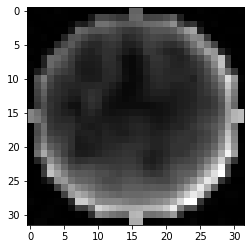

In [6]:

# In[ ]:


index = 198
plt.imshow(X_train_orig[index],cmap = 'gray')
print("y = " + str(np.squeeze(Y_train_orig[index])))
print(X_train_orig[index].shape)

In [7]:
from keras.utils import to_categorical
Y_test_orig = to_categorical(Y_test_orig, num_classes=2) 
Y_train_orig = to_categorical(Y_train_orig, num_classes=2)

In [8]:

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
# import regularizer
from keras.regularizers import l2
# instantiate regularizer
#reg = l1(0.001)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))  #Dropout for regularization
#model.add(layers.Dropout(0.50))  #Dropout for regularization

model.add(layers.Dense(128, activation='linear', activity_regularizer=l2(0.0003)))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(512, activation='relu', activity_regularizer=l2(0.0001)))
model.add(layers.Dense(2, activation='softmax'))  #Softwamx function at the end because we have 3 classes


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [10]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
#print(categorical_labels.shape)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:

# In[ ]:


ntrain = len(X_train_orig)
nval = len(X_test_orig)
X_train_orig = X_train_orig.reshape((len(X_train_orig),32,32,1)) 
X_test_orig = X_test_orig.reshape((len(X_test_orig),32,32,1))

print(X_train_orig.shape)
print(X_test_orig.shape)

train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 40, width_shift_range = .2,
                                  height_shift_range = .2, shear_range = .2, zoom_range =  .2, horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(X_train_orig,Y_train_orig,batch_size=32)
val_generator = val_datagen.flow(X_test_orig,Y_test_orig,batch_size = 32)


#X_train_orig, X_test_orig, Y_train_orig,Y_test_orig
history = model.fit_generator(train_generator,steps_per_epoch = ntrain/32, epochs = 64, validation_data = val_generator, validation_steps = nval/32  )


W0801 16:22:00.055947 17492 deprecation.py:323] From <ipython-input-11-7b080943151f>:22: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


(732, 32, 32, 1)
(39, 32, 32, 1)
Epoch 1/64
23/22 [==============================] - 3s 142ms/step - loss: 0.6437 - accuracy: 0.6107 - val_loss: 0.6322 - val_accuracy: 0.5641
Epoch 2/64
23/22 [==============================] - 2s 99ms/step - loss: 0.6115 - accuracy: 0.6366 - val_loss: 0.5653 - val_accuracy: 0.6667
Epoch 3/64
23/22 [==============================] - 3s 115ms/step - loss: 0.5885 - accuracy: 0.6776 - val_loss: 0.4764 - val_accuracy: 0.8205
Epoch 4/64
23/22 [==============================] - 2s 108ms/step - loss: 0.5551 - accuracy: 0.7199 - val_loss: 0.4968 - val_accuracy: 0.7436
Epoch 5/64
23/22 [==============================] - 2s 96ms/step - loss: 0.5327 - accuracy: 0.7350 - val_loss: 0.4232 - val_accuracy: 0.8974
Epoch 6/64
23/22 [==============================] - 2s 96ms/step - loss: 0.5107 - accuracy: 0.7473 - val_loss: 0.4113 - val_accuracy: 0.8462
Epoch 7/64
23/22 [==============================] - 3s 111ms/step - loss: 0.5310 - accuracy: 0.7268 - val_loss: 0.4833

23/22 [==============================] - 2s 97ms/step - loss: 0.1947 - accuracy: 0.9235 - val_loss: 0.1797 - val_accuracy: 0.9487
Epoch 59/64
23/22 [==============================] - 2s 96ms/step - loss: 0.2082 - accuracy: 0.9085 - val_loss: 0.1823 - val_accuracy: 0.9231
Epoch 60/64
23/22 [==============================] - 2s 98ms/step - loss: 0.2226 - accuracy: 0.9194 - val_loss: 0.0965 - val_accuracy: 0.9744
Epoch 61/64
23/22 [==============================] - 2s 93ms/step - loss: 0.2070 - accuracy: 0.9262 - val_loss: 0.1189 - val_accuracy: 0.9487
Epoch 62/64
23/22 [==============================] - 2s 94ms/step - loss: 0.1749 - accuracy: 0.9331 - val_loss: 0.1380 - val_accuracy: 0.9487
Epoch 63/64
23/22 [==============================] - 2s 96ms/step - loss: 0.2029 - accuracy: 0.9235 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 64/64
23/22 [==============================] - 2s 99ms/step - loss: 0.1881 - accuracy: 0.9249 - val_loss: 0.0638 - val_accuracy: 1.0000


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


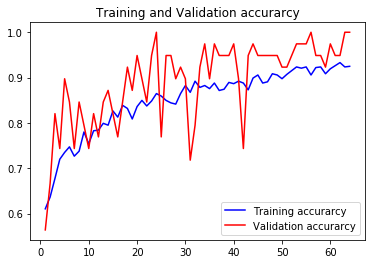

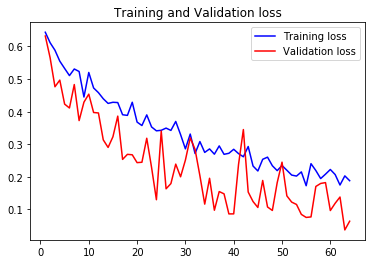

In [16]:
# In[ ]:


#lets plot the train and val curve
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [22]:

_, accuracy = model.evaluate(val_generator,steps = 32)
print('Validation Accuracy: %.2f' % (accuracy*100))

_, accuracy = model.evaluate(train_generator,steps = 32)
print('Training Accuracy: %.2f' % (accuracy*100))

model.save(r'C:\Users\AlienTech\Desktop\Interview\Code\Checkbox\radioBt_keras_model_v1.h5')
# ### Save the model
# with open(r'C:\Users\AlienTech\Desktop\Interview\Code\Checkbox\checkbox_keras_model_v1.pickle', 'w') as f:
#          pickle.dump(model, f)
# f.close()

32/32 [==============================] - 0s 5ms/step - loss: 0.0726 - accuracy: 1.0000
Validation Accuracy: 100.00
32/32 [==============================] - 0s 12ms/step - loss: 0.1791 - accuracy: 0.9341
Training Accuracy: 93.41


In [18]:
test_dir = r'C:\Users\AlienTech\Desktop\Interview\Code\Checkbox\Radio Test Models'

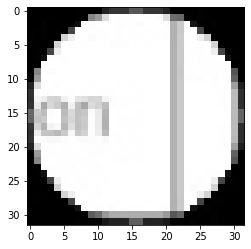

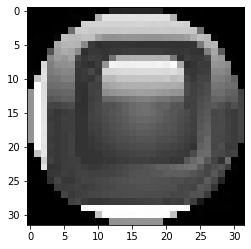

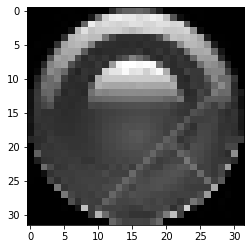

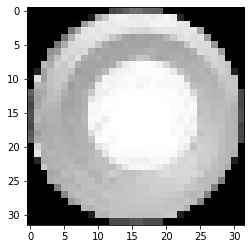

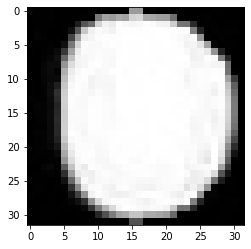

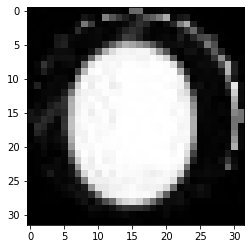

W0801 17:33:36.863604 17492 deprecation.py:323] From <ipython-input-20-51e429d1922c>:21: Sequential.predict_proba (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use `model.predict()` instead.


array([[9.9996305e-01, 3.6968471e-05],
       [3.2892859e-01, 6.7107147e-01],
       [1.4957822e-03, 9.9850428e-01],
       [2.6749977e-01, 7.3250014e-01],
       [2.5514665e-01, 7.4485338e-01],
       [9.6902579e-01, 3.0974211e-02]], dtype=float32)

In [20]:
checkbox = []
for x in os.listdir(test_dir):
    #print(x)
    roi = cv2.imread(os.path.join(test_dir,x),0)
    
    resized_roi = cv2.resize(roi, (32,32), interpolation = cv2.INTER_LINEAR)
    plt.imshow(resized_roi,cmap = 'gray')
    plt.show()
    
    resized_roi = resized_roi.reshape((resized_roi.shape)+(1,))
    
    checkbox.append(resized_roi)
    #print(resized_roi.shape)
    #plt.imshow(resized_roi)
    #plt.show()
    
checkbox = np.array(checkbox)
checkbox.shape
#model.predict(checkbox/255)
#model.predict_classes(checkbox/255)
model.predict_proba(checkbox/255)